# Collect the Data

## Use NumPy module to generate over 1500 random latitude and longitude pairs

In [1]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90, high = 90, size = 1500)
lngs = np.random.uniform(low = -180, high = 180, size = 1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
# Add latitude and longitude tuples to list
coordinates = list(lats_lngs)

## Match coordinates to the nearest city using Python's citipy module

In [4]:
# Import citipy module
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

## Use the OpenWeatherMap API to request the current weather data from each unique city in your list. Parse the JSON data from the API request, and obtain the following data for each city:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed

## Then add the data to a pandas DataFrame

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call. Units = Imperial
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=114bba6fa0eed51bc8e39279807587ea


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city. replace method used to take out blank spaces and concatenate city names.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | salalah
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | saint george
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | nanortalik
Processing Record 10 of Set 1 | koslan
Processing Record 11 of Set 1 | victoria
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | hinton
Processing Record 14 of Set 1 | fairbanks
Processing Record 15 of Set 1 | san carlos de bariloche
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | lompoc
Processing Record 18 of Set 1 | solnechnyy
Processing Record 19 of Set 1 | nikki
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | tuktoyaktuk


Processing Record 43 of Set 4 | bereda
Processing Record 44 of Set 4 | coihaique
Processing Record 45 of Set 4 | ilulissat
Processing Record 46 of Set 4 | pombas
Processing Record 47 of Set 4 | crawfordsville
Processing Record 48 of Set 4 | ak-dovurak
Processing Record 49 of Set 4 | chapayevka
Processing Record 50 of Set 4 | coahuayana
Processing Record 1 of Set 5 | lasa
Processing Record 2 of Set 5 | bunumbu
Processing Record 3 of Set 5 | soe
Processing Record 4 of Set 5 | isabela
Processing Record 5 of Set 5 | cidreira
Processing Record 6 of Set 5 | oranjestad
Processing Record 7 of Set 5 | devils lake
Processing Record 8 of Set 5 | assela
City not found. Skipping...
Processing Record 9 of Set 5 | okhotsk
Processing Record 10 of Set 5 | galiwinku
City not found. Skipping...
Processing Record 11 of Set 5 | zapadnaya dvina
Processing Record 12 of Set 5 | el alto
Processing Record 13 of Set 5 | lujan
Processing Record 14 of Set 5 | shache
Processing Record 15 of Set 5 | amderma
City not

Processing Record 29 of Set 8 | mahebourg
Processing Record 30 of Set 8 | port hardy
Processing Record 31 of Set 8 | port townsend
Processing Record 32 of Set 8 | la ronge
Processing Record 33 of Set 8 | hermon
Processing Record 34 of Set 8 | kovur
Processing Record 35 of Set 8 | saint-pierre
Processing Record 36 of Set 8 | gravdal
Processing Record 37 of Set 8 | moose factory
Processing Record 38 of Set 8 | haines junction
Processing Record 39 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 40 of Set 8 | sinazongwe
Processing Record 41 of Set 8 | moses lake
Processing Record 42 of Set 8 | carnot
Processing Record 43 of Set 8 | imeni poliny osipenko
Processing Record 44 of Set 8 | prince rupert
Processing Record 45 of Set 8 | trat
Processing Record 46 of Set 8 | taoudenni
Processing Record 47 of Set 8 | namanga
Processing Record 48 of Set 8 | pecos
Processing Record 49 of Set 8 | bestobe
Processing Record 50 of Set 8 | muriti
Processing Record 1 of Set 9 | cuajinic

Processing Record 19 of Set 12 | juan lacaze
Processing Record 20 of Set 12 | amparafaravola
Processing Record 21 of Set 12 | skiros
City not found. Skipping...
Processing Record 22 of Set 12 | artyom
Processing Record 23 of Set 12 | san jose
Processing Record 24 of Set 12 | dickinson
Processing Record 25 of Set 12 | along
Processing Record 26 of Set 12 | berbera
Processing Record 27 of Set 12 | calabozo
Processing Record 28 of Set 12 | ushibuka
Processing Record 29 of Set 12 | maxixe
Processing Record 30 of Set 12 | kangavar
Processing Record 31 of Set 12 | phonhong
Processing Record 32 of Set 12 | manutuke
Processing Record 33 of Set 12 | oudtshoorn
Processing Record 34 of Set 12 | acapulco
Processing Record 35 of Set 12 | nizwa
Processing Record 36 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 37 of Set 12 | quesnel
Processing Record 38 of Set 12 | benguela
Processing Record 39 of Set 12 | nassau
Processing Record 40 of Set 12 | hammerfest
Processing Record 41 of

In [9]:
# Check to ensure data from at least 500 cities has been collected.
len(city_data)

563

In [10]:
# Convert city_data to a dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,55.00,69,39,1.81,AU,2021-01-12 18:19:40
1,Salalah,17.0151,54.0924,75.20,23,0,13.80,OM,2021-01-12 18:21:16
2,Rikitea,-23.1203,-134.9692,77.79,77,15,17.38,PF,2021-01-12 18:21:16
3,Qaanaaq,77.4840,-69.3632,10.65,83,96,8.23,GL,2021-01-12 18:21:16
4,Whitehorse,60.7161,-135.0538,19.40,93,90,3.44,CA,2021-01-12 18:21:17
5,Saint George,37.1041,-113.5841,33.80,37,1,3.58,US,2021-01-12 18:17:17
6,Dikson,73.5069,80.5464,0.70,94,98,8.70,RU,2021-01-12 18:21:17
7,Nanortalik,60.1432,-45.2371,32.38,92,100,7.74,GL,2021-01-12 18:21:17
8,Koslan,63.4564,48.8989,-14.33,87,0,3.71,RU,2021-01-12 18:21:18
9,Victoria,22.2855,114.1577,53.01,41,29,6.46,HK,2021-01-12 18:20:08


In [11]:
# reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2021-01-12 18:19:40,-42.7826,147.0587,55.00,69,39,1.81
1,Salalah,OM,2021-01-12 18:21:16,17.0151,54.0924,75.20,23,0,13.80
2,Rikitea,PF,2021-01-12 18:21:16,-23.1203,-134.9692,77.79,77,15,17.38
3,Qaanaaq,GL,2021-01-12 18:21:16,77.4840,-69.3632,10.65,83,96,8.23
4,Whitehorse,CA,2021-01-12 18:21:17,60.7161,-135.0538,19.40,93,90,3.44


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plotting the data

In [60]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

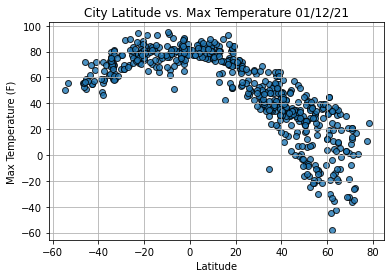

In [61]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

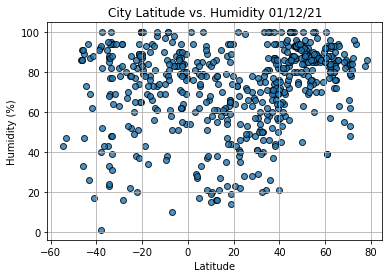

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

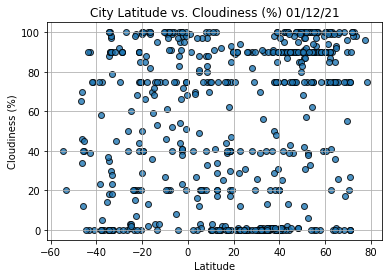

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

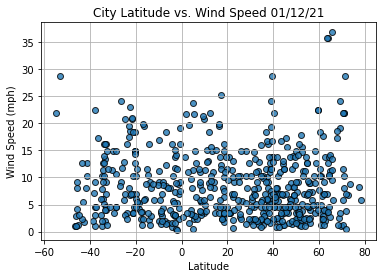

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [49]:
# Import linear regression function
from scipy.stats import linregress

# Define function to plot regression line & scatterplot of weather parameter 'y' against latitude ('x')
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate regression line values
    reg_values = x_values * slope + intercept
    
    # Define regression line equation
    line_eq = (f"y = {slope:.2f}x + {intercept:.2f}\n"
              f"r-value = {r_value:.4f}")
    
    # Plot x- and y- values
    plt.scatter(x_values, y_values)
    
    # Plot regression values
    plt.plot(x_values, reg_values, "r")
    
    # Annotate plot
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq, (text_coordinates), fontsize=14, color="red")
    plt.show()

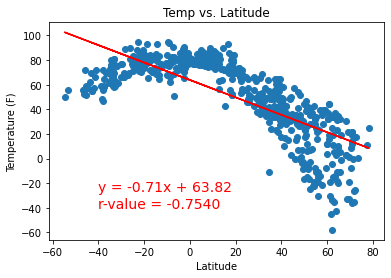

In [50]:
plot_linear_regression(lats, max_temps, 'Temp vs. Latitude', 'Temperature (F)', (-40, -40))

In [51]:
# Create a Northern Hemisphere DataFrame (0 < Lat <= 90) from city_data_df
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2021-01-12 18:19:40,-42.7826,147.0587,55.00,69,39,1.81
2,Rikitea,PF,2021-01-12 18:21:16,-23.1203,-134.9692,77.79,77,15,17.38
10,East London,ZA,2021-01-12 18:21:18,-33.0153,27.9116,69.80,94,90,6.91
13,San Carlos De Bariloche,AR,2021-01-12 18:21:19,-41.1456,-71.3082,72.00,17,0,12.66
14,Atuona,PF,2021-01-12 18:21:19,-9.8000,-139.0333,77.58,79,46,16.87


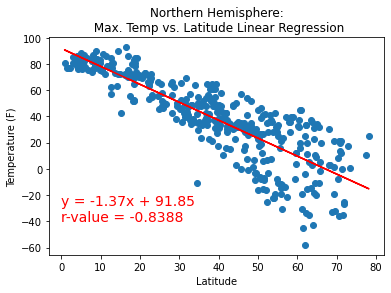

In [75]:
# Perform linear regression on max temperature in the northern hemisphere
plot_linear_regression(northern_hemi_df['Lat'],
                       northern_hemi_df['Max Temp'],
                       'Northern Hemisphere:\n Max. Temp vs. Latitude Linear Regression',
                       'Temperature (F)',
                       (0,-40))

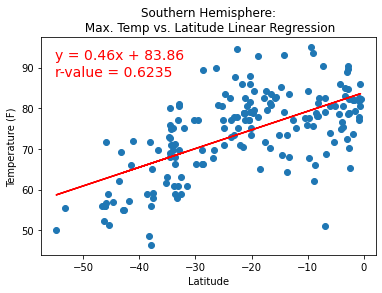

In [74]:
# Perform linear regression on max temperature in the southern hemisphere
plot_linear_regression(southern_hemi_df['Lat'],
                       southern_hemi_df['Max Temp'],
                       'Southern Hemisphere:\n Max. Temp vs. Latitude Linear Regression',
                       'Temperature (F)',
                       (-55,88))

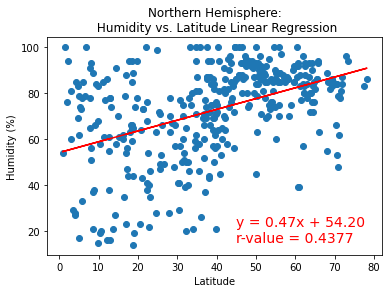

In [72]:
# Perform linear regression on percent humidity in the northern hemisphere
plot_linear_regression(northern_hemi_df['Lat'],
                       northern_hemi_df['Humidity'],
                       'Northern Hemisphere:\n Humidity vs. Latitude Linear Regression',
                       'Humidity (%)',
                       (45,15))

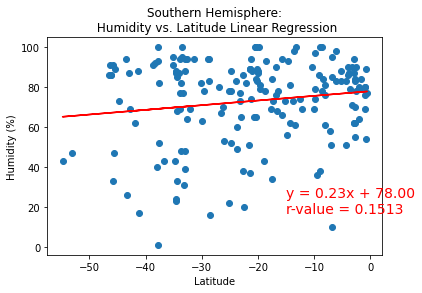

In [73]:
# Perform linear regression on percent humidity in the southern hemisphere
plot_linear_regression(southern_hemi_df['Lat'],
                       southern_hemi_df['Humidity'],
                       'Southern Hemisphere:\n Humidity vs. Latitude Linear Regression',
                       'Humidity (%)',
                       (-15,17))

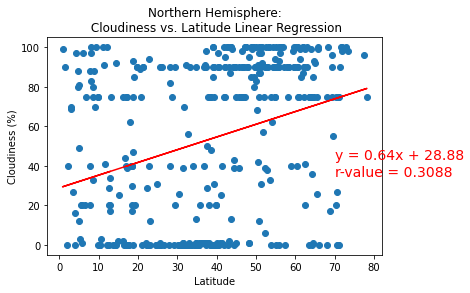

In [77]:
# Perform linear regression on percent cloudiness in the northern hemisphere
plot_linear_regression(northern_hemi_df['Lat'],
                       northern_hemi_df['Cloudiness'],
                       'Northern Hemisphere:\n Cloudiness vs. Latitude Linear Regression',
                       'Cloudiness (%)',
                       (70,35))

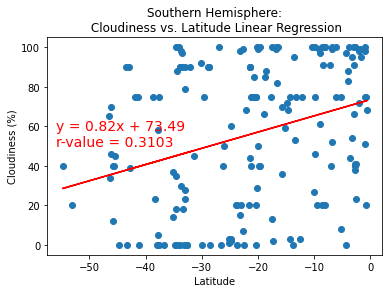

In [86]:
# Perform linear regression on percent cloudiness in the southern hemisphere
plot_linear_regression(southern_hemi_df['Lat'],
                       southern_hemi_df['Cloudiness'],
                       'Southern Hemisphere:\n Cloudiness vs. Latitude Linear Regression',
                       'Cloudiness (%)',
                       (-56,50))

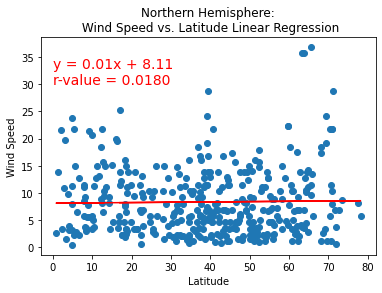

In [88]:
# Perform linear regression on wind speed in the northern hemisphere
plot_linear_regression(northern_hemi_df['Lat'],
                       northern_hemi_df['Wind Speed'],
                       'Northern Hemisphere:\n Wind Speed vs. Latitude Linear Regression',
                       'Wind Speed',
                       (0,30))

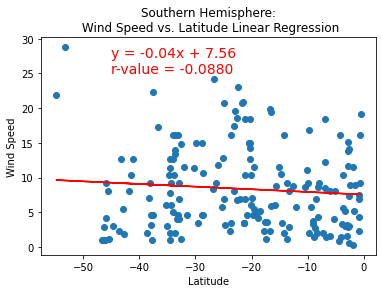

In [90]:
# Perform linear regression on wind speed in the southern hemisphere
plot_linear_regression(southern_hemi_df['Lat'],
                       southern_hemi_df['Wind Speed'],
                       'Southern Hemisphere:\n Wind Speed vs. Latitude Linear Regression',
                       'Wind Speed',
                       (-45,25))